## Working with the Normal Distribution (converting between standardized and actual)

This is a set of examples summarizing the difference between standardized and actual distributions.

In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 4 # Some specific value/outcome of your random variable X
mu = 5 # The mean of X
sigma = 2 # The standard deviation X
X = stats.norm(mu, sigma) # Normal distribution associated to X

Z = stats.norm # Normal distribution with standardized values (mean = 0, standard deviation = 1)
z_points = np.linspace(-4,4,1000) # A collection of many possible outcomes/values Z, the standardized version of X

#### Converting from z values to x values

In [3]:
# Scale and translate from standardized value to real value
x_points = (z_points.copy() * sigma) + mu # A collection of many possible outcomes/values of X

#### Converting from x values to z values

In [4]:
# Translate and scale from real value to standardized value
z = (x - mu) / sigma # Some specific value/outcome of your random variable X, scaled and translated into a standardized value.

Graphically, the mean (mu) is a translation and the standard deviation (sigma) is a scale or "stretch." The documentation for using distributions in scipy.stats refer to the related arguments as location and scale (the location to move to and the scale of the stretch).

#### NOTE!

Since the area under a probability denstiy function is one by definition, if we stretch the graph horizontally by some value (let's say times 2, making it wider), then the vertical direction will get compressed by the same scale to preserve the area under the curve (correspondingly times 1/2 in this example).

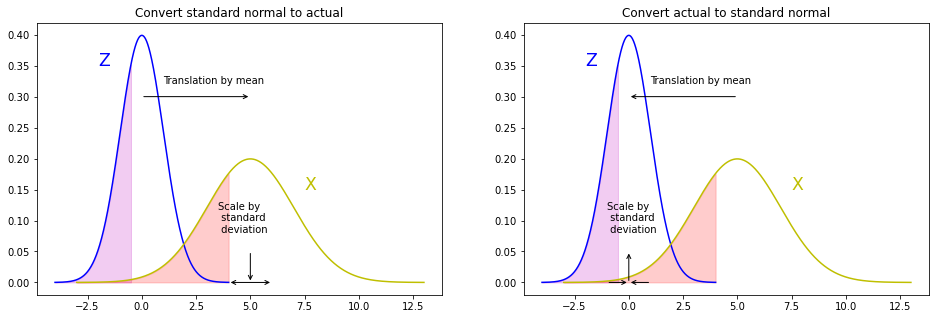

In [6]:
figure, position = plt.subplots(1,2, figsize=(16,5))

# Left plot
position[0].plot(z_points,Z.pdf(z_points), color = 'b')
position[0].plot(x_points,X.pdf(x_points), color = 'y')
position[0].set_title("Convert standard normal to actual")
z_base = np.linspace(-4,-.5,50)
position[0].fill_between(z_base, Z.pdf(z_base), color="m", alpha=.2)
x_base = z_base * sigma + mu
position[0].fill_between(x_base, X.pdf(x_base), color="r", alpha=.2)

# Add descriptive annotations
position[0].annotate("Z",xy=(-2, .35), color='b',size="xx-large")
position[0].annotate("X",xy=(7.5, .15), color='y',size="xx-large")
position[0].annotate("", xy=(5, .3), xytext=(0, .3), arrowprops=dict(arrowstyle="->", connectionstyle="arc3")) # translation
position[0].annotate("Translation by mean", xy=(1, .32))
position[0].annotate("", xy=(4, 0), xytext=(6, 0), arrowprops=dict(arrowstyle="<->", connectionstyle="arc3")) # horizontal scale
position[0].annotate("", xy=(5, .05), xytext=(5, 0), arrowprops=dict(arrowstyle="<-", connectionstyle="arc3")) # vertical scale
position[0].annotate("Scale by \n standard \n deviation", xy=(3.5, .08))

# Right plot
position[1].plot(z_points,Z.pdf(z_points), color = 'b')
position[1].plot(x_points,X.pdf(x_points), color = 'y')
position[1].set_title("Convert actual to standard normal")
position[1].fill_between(z_base, Z.pdf(z_base), color="m", alpha=.2)
position[1].fill_between(x_base, X.pdf(x_base), color="r", alpha=.2)

# Add descriptive annotations
position[1].annotate("Z",xy=(-2, .35), color='b',size="xx-large")
position[1].annotate("X",xy=(7.5, .15), color='y',size="xx-large")
position[1].annotate("", xy=(5, .3), xytext=(0, .3), arrowprops=dict(arrowstyle="<-", connectionstyle="arc3")) # translation
position[1].annotate("Translation by mean", xy=(1, .32))
position[1].annotate("", xy=(0, 0), xytext=(1, 0), arrowprops=dict(arrowstyle="->", connectionstyle="arc3")) # horizontal scale
position[1].annotate("", xy=(0, 0), xytext=(-1, 0), arrowprops=dict(arrowstyle="->", connectionstyle="arc3")) # horizontal scale
position[1].annotate("", xy=(0, .05), xytext=(0, 0), arrowprops=dict(arrowstyle="->", connectionstyle="arc3")) # vertical scale
position[1].annotate("Scale by \n standard \n deviation", xy=(-1, .08))

plt.show()

As a result of this balancing act between horizontal and vertical scales, the cumulative distribution method (.cdf) does not require additional scaling when considering the output, but the the probability density method (.pdf) does!

Cummulative distribution gives you an area, which is impacted by both the horizontal and vertical scale (which cancel out as far as area is concerned). However, probability density is value that will need to account for the additional vertical scaling.

In [7]:
print("Probability Density Function")
print("Look up x from our .norm(x_points, mu, sigma) distribution:",X.pdf(x))
print("Look up z (converted x) from our standard normal distribution:", Z.pdf(z))
print("Look up z in our standard normal distribution and scale the probability density (vertical) value:",Z.pdf(z)/sigma)
print("")
print("Cummulative Distribution Function")
print("Look up the area before X=x:", X.cdf(x))
print("Look up the area before Z=z:", Z.cdf(z))

Probability Density Function
Look up x from our .norm(x_points, mu, sigma) distribution: 0.17603266338214976
Look up z (converted x) from our standard normal distribution: 0.3520653267642995
Look up z in our standard normal distribution and scale the probability density (vertical) value: 0.17603266338214976

Cummulative Distribution Function
Look up the area before X=x: 0.3085375387259869
Look up the area before Z=z: 0.3085375387259869
